In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv(r"C:\Users\giova\OneDrive\Documentos\4º Semestre\scientificProject\Projeto\dados_banco.csv",sep=',')
# 
# df = df.drop(columns=['Unnamed: 0'])
# 
# print(df.dtypes)
df.isnull().sum().sort_values(ascending=False).head(10)

Unnamed: 0            0
Cliente               0
Sexo                  0
Idade                 0
Empresa               0
Salario               0
Saldo_cc              0
Saldo_poupança        0
Saldo_investimento    0
Devedor_cartao        0
dtype: int64

In [3]:
print(f"Total de linhas {df.shape[0]}")

Total de linhas 10000


In [4]:
# display(df.head(50))
# display(df.describe(include='all'))

# display("Os unicos da coluna empresa são: " + ",".join(df.Empresa.unique()))

display("Os unicos da coluna sexo são: " + ",".join(df.Sexo.unique()))

'Os unicos da coluna sexo são: M,F'

In [5]:
columns = ['Cliente', 'Sexo', 'Idade', 'Empresa', 'Salario', 'Saldo_cc','Saldo_poupança', 'Saldo_investimento', 'Devedor_cartao','Inadimplente']
def RegressaoLinearTrabalhoCalculo(colunas: list, coluna_x: int, coluna_y: int) -> None:
    x = np.array(df[colunas[coluna_x]]).reshape(-1, 1);xold=df[colunas[coluna_x]]
    y=df[colunas[coluna_y]]
    modelo = LinearRegression().fit(x, y)
    R2 = r2_score(y, modelo.predict(x))
    correlacao = np.corrcoef(xold, y)
    print(f'R2: {R2} \nCorrelação = {correlacao[0][1]}')
    print(f'Valor de interceptação ( b da equacação ): {modelo.intercept_} | \nCoeficiente angular = {modelo.coef_}')
    plt.scatter(x, y)
    plt.plot(x, modelo.predict(x), color = 'red')

R2: 0.0005906858621302913 
Correlação = 0.024304029750850484
Valor de interceptação ( b da equacação ): 2062.1386352099526 | 
Coeficiente angular = [0.12312363]


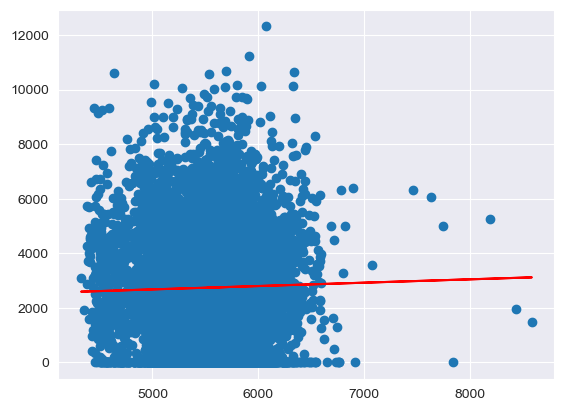

In [6]:
RegressaoLinearTrabalhoCalculo(columns, 4, 8)

R2: 0.0206518435716746 
Correlação = -0.14370749309508657
Valor de interceptação ( b da equacação ): 3635.143917172367 | 
Coeficiente angular = [-1.16095795]


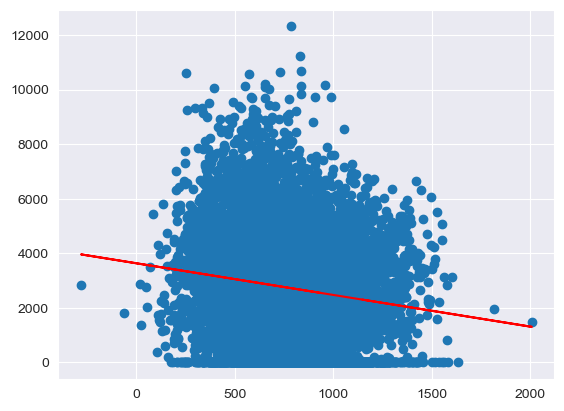

In [8]:
RegressaoLinearTrabalhoCalculo(columns, 5, 8)

R2: 0.002782620318903972 
Correlação = 0.052750548043632675
Valor de interceptação ( b da equacação ): -766.0147975693812 | 
Coeficiente angular = [70.52894027]


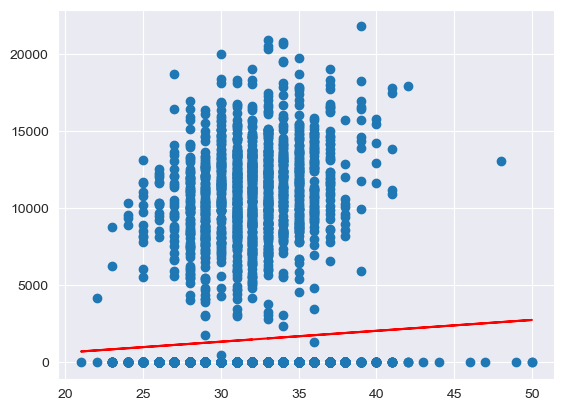

In [9]:
RegressaoLinearTrabalhoCalculo(columns, 2, 7)

R2: 0.005451791139737372 
Correlação = 0.07383624543364363
Valor de interceptação ( b da equacação ): -3603.3801181694516 | 
Coeficiente angular = [1.06292634]


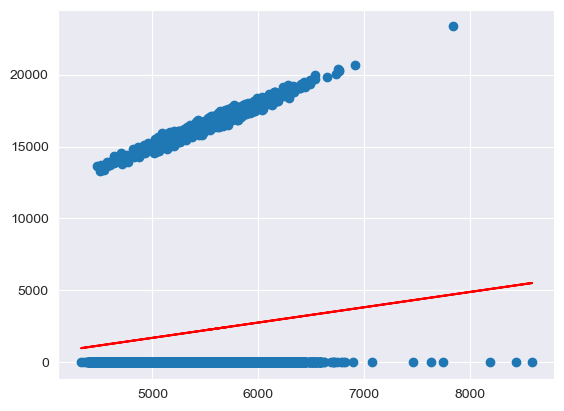

In [10]:
RegressaoLinearTrabalhoCalculo(columns, 4, 6)

R2: 0.2843713950192498 
Correlação = 0.5332648450997401
Valor de interceptação ( b da equacação ): -1060.045016804689 | 
Coeficiente angular = [0.33440209]


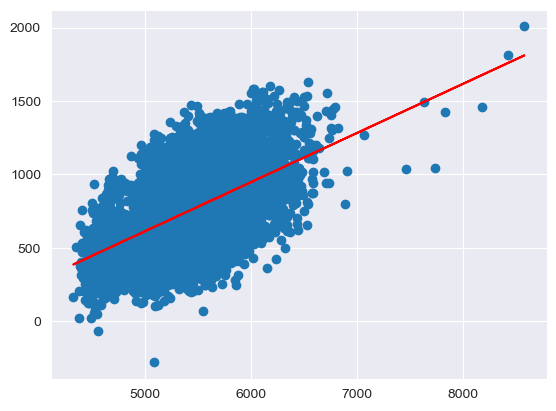

In [11]:
RegressaoLinearTrabalhoCalculo(columns, 4, 5)

# Exercicio 2:
A partir daqui vamos fazer o código da implementação do exercicio 2
-----
Fazer uma regressão linear múltipla utilizando no mínimo quatro variáveis dependentes (x). Apresentar os resultados para o coeficiente de determinação(R2) e os coeficientes da regressão sm.ols  e verificar quais variáveis dependentes devem ser descartadas analisando o p-valor. Após descartar a variável menos significativa refazer a regressão novamente.



In [12]:
import seaborn as sns
import statsmodels.formula.api as sm

df = pd.get_dummies(df)
print("Colunas:")
print("\n".join(df.columns))
df =df.astype(np.float64)
display(df.dtypes)
display(df.head(25))

Colunas:
Unnamed: 0
Cliente
Idade
Salario
Saldo_cc
Saldo_poupança
Saldo_investimento
Devedor_cartao
Inadimplente
Sexo_F
Sexo_M
Empresa_Autônomo
Empresa_Privada
Empresa_Pública


Unnamed: 0            float64
Cliente               float64
Idade                 float64
Salario               float64
Saldo_cc              float64
Saldo_poupança        float64
Saldo_investimento    float64
Devedor_cartao        float64
Inadimplente          float64
Sexo_F                float64
Sexo_M                float64
Empresa_Autônomo      float64
Empresa_Privada       float64
Empresa_Pública       float64
dtype: object

,Unnamed: 0,Cliente,Idade,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente,Sexo_F,Sexo_M,Empresa_Autônomo,Empresa_Privada,Empresa_Pública
0,75928.0,75928.0,32.0,5719.00,933.79,0.00,0.00,6023.68,0.0,0.0,1.0,0.0,1.0,0.0
1,52921.0,52921.0,28.0,5064.00,628.37,0.00,0.00,1578.24,0.0,1.0,0.0,0.0,1.0,0.0
2,8387.0,8387.0,24.0,4739.00,889.18,0.00,0.00,2578.70,0.0,1.0,0.0,1.0,0.0,0.0
3,54522.0,54522.0,30.0,5215.00,1141.47,0.00,0.00,4348.96,0.0,0.0,1.0,0.0,0.0,1.0
4,45397.0,45397.0,30.0,5215.56,520.70,0.00,0.00,1516.78,1.0,0.0,1.0,1.0,0.0,0.0
5,59597.0,59597.0,34.0,5443.00,783.61,0.00,0.00,3585.23,0.0,0.0,1.0,0.0,1.0,0.0
6,81859.0,81859.0,29.0,4977.42,540.36,0.00,0.00,4485.24,1.0,1.0,0.0,0.0,1.0,0.0
7,52067.0,52067.0,33.0,5337.08,472.37,0.00,0.00,3714.89,1.0,1.0,0.0,0.0,1.0,0.0
8,51380.0,51380.0,32.0,5234.00,945.52,15748.31,9482.78,0.00,0.0,0.0,1.0,1.0,0.0,0.0
9,68076.0,68076.0,32.0,5492.00,1121.00,0.00,0.00,2400.88,0.0,0.0,1.0,0.0,1.0,0.0


In [13]:
model = sm.ols(formula='Idade ~ Salario+Saldo_cc+Saldo_poupança+Saldo_investimento-1', data=df)
result = model.fit()
display(result.summary())
print(classmethod(result))




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Idade   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.053e+06
Date:                Tue, 12 Nov 2024   Prob (F-statistic):                        0.00
Time:                        13:42:51   Log-Likelihood:                         -18598.
No. Observations:               10000   AIC:                                  3.720e+04
Df Residuals:                    9996   BIC:                                  3.723e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Salario                0.0058   1.03e-05    565.460      0.000       0.006       0.006
Saldo_cc              -0.0003   7.03e-05     -3.735      0.000      -0.000      -0.000
Saldo_poupança     -1.417e-05   9.84e-06     -1.441      0.150   -3.34e-05    5.11e-06
Saldo_investimento  1.718e-05   1.42e-05      1.209      0.227   -1.07e-05     4.5e-05
==============================================================================
Omnibus:                        3.162   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.206   Jarque-Bera (JB):                3.296
Skew:                           0.004   Prob(JB):                        0.192
Kurtosis:                       3.089   Cond. No.                         35.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model = sm.ols(formula='Idade ~ Salario+Saldo_cc+Saldo_poupança-1', data=df)
result = model.fit()
display(result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Idade   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.404e+06
Date:                Tue, 12 Nov 2024   Prob (F-statistic):                        0.00
Time:                        13:43:12   Log-Likelihood:                         -18599.
No. Observations:               10000   AIC:                                  3.720e+04
Df Residuals:                    9997   BIC:                                  3.723e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Salario            0.0058   1.03e-05    565.469      0.000       0.006       0.006
Saldo_cc          -0.0003   7.03e-05     -3.744      0.000      -0.000      -0.000
Saldo_poupança -2.757e-06   2.76e-06     -0.998      0.318   -8.17e-06    2.66e-06
==============================================================================
Omnibus:                        3.122   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                3.251
Skew:                           0.004   Prob(JB):                        0.197
Kurtosis:                       3.088   Cond. No.                         31.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

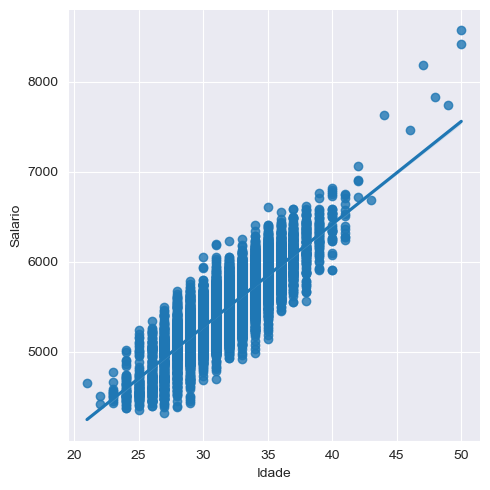

In [15]:
sns.lmplot(x='Idade',y='Salario',data=df)
plt.show()

<Axes: >

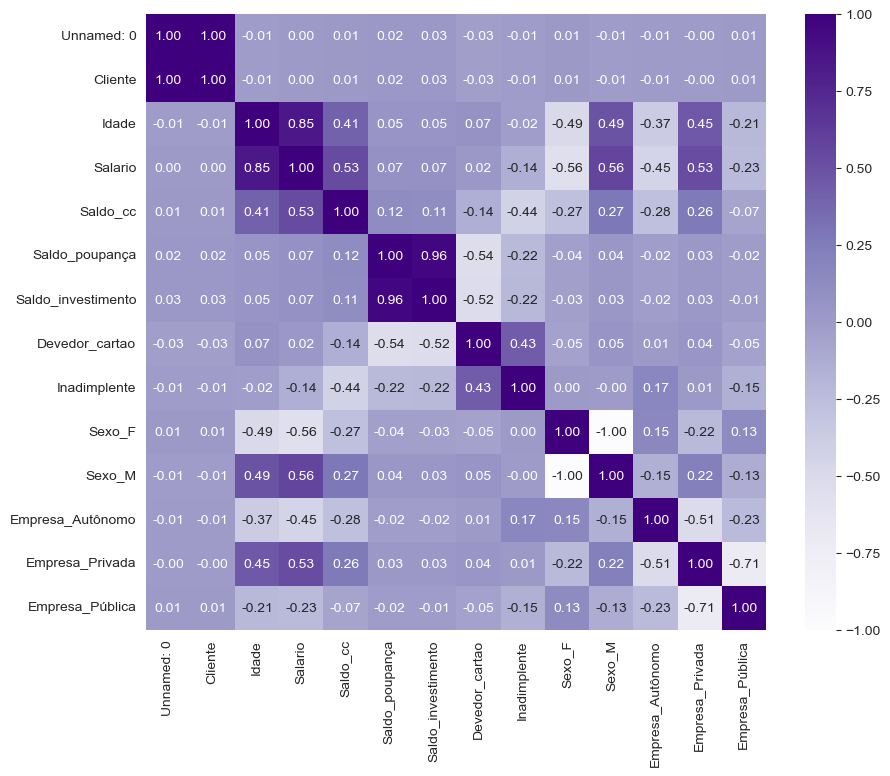

In [16]:
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Purples')

In [17]:
display("CU")

'CU'